In [56]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv("tp_df.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df

,company_name,adv_topic_0,adv_topic_1,adv_topic_2,adv_topic_3,adv_topic_4,adv_topic_5,adv_topic_6,adv_topic_7,adv_topic_8,dadv_topic_0,dadv_topic_1,dadv_topic_2,dadv_topic_3,dadv_topic_4,dadv_topic_5,dadv_topic_6,average_salary,total_sale,turn_over_rate
0,국민건강보험공단,0.946027,0.000000,0.014878,0.000000,0.000000,0.000000,0.000000,0.033859,0.000000,0.000000,0.073691,0.000000,0.013542,0.000000,0.912490,0.000000,6441,75400.0,0.20
1,근로복지공단,0.695667,0.000000,0.000000,0.228961,0.019995,0.000000,0.000000,0.054949,0.000000,0.000000,0.224451,0.000000,0.000000,0.000000,0.775140,0.000000,5817,9406.2,0.13
2,농협은행,0.275781,0.000000,0.000000,0.000000,0.000000,0.000000,0.516844,0.163050,0.031689,0.084182,0.229913,0.022778,0.021380,0.000000,0.631737,0.000000,6182,13100.0,0.15
3,현대카드,0.061863,0.000000,0.000000,0.220649,0.000000,0.365488,0.173676,0.000000,0.177817,0.000000,0.514205,0.356452,0.000000,0.097374,0.000000,0.029307,8737,2300.0,0.35
4,중소기업은행,0.511053,0.000000,0.000000,0.000000,0.000000,0.000000,0.481808,0.000000,0.000000,0.000000,0.258842,0.000000,0.000000,0.071889,0.656891,0.000000,10065,14800.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,유끼커뮤니케이션,0.000000,0.000000,0.000000,0.000000,0.000000,0.936469,0.000000,0.000000,0.000000,0.000000,0.000000,0.959034,0.000000,0.000000,0.000000,0.000000,4417,28.0,0.14
2499,투어이천,0.919112,0.010111,0.010109,0.010110,0.010113,0.010113,0.010110,0.010112,0.010111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.942648,1314,108.9,1.36
2500,휴먼코아,0.000000,0.456919,0.000000,0.000000,0.000000,0.000000,0.013032,0.525660,0.000000,0.000000,0.311305,0.000000,0.000000,0.000000,0.000000,0.682863,3062,430.1,1.00
2501,에이치엔씨네트워크,0.000000,0.000000,0.000000,0.000000,0.296156,0.305233,0.000000,0.221588,0.170775,0.000000,0.453240,0.000000,0.044698,0.000000,0.000000,0.494197,3038,336.9,0.68


In [58]:
df = df[df['turn_over_rate']<1]
error_firm = ['동원홈푸드','휠라홀딩스','트리','와디즈','키위컴퍼니','줌인터넷','시선인터내셔널','브이티코스메틱','유니슨이테크','씨엠비대전방송','서울비젼','더메인즈','조은시스템']

for i in error_firm:
    df = df[df.company_name != i]
df


,company_name,adv_topic_0,adv_topic_1,adv_topic_2,adv_topic_3,adv_topic_4,adv_topic_5,adv_topic_6,adv_topic_7,adv_topic_8,dadv_topic_0,dadv_topic_1,dadv_topic_2,dadv_topic_3,dadv_topic_4,dadv_topic_5,dadv_topic_6,average_salary,total_sale,turn_over_rate
0,국민건강보험공단,0.946027,0.000000,0.014878,0.000000,0.000000,0.000000,0.000000,0.033859,0.000000,0.000000,0.073691,0.000000,0.013542,0.000000,0.912490,0.000000,6441,75400.0,0.20
1,근로복지공단,0.695667,0.000000,0.000000,0.228961,0.019995,0.000000,0.000000,0.054949,0.000000,0.000000,0.224451,0.000000,0.000000,0.000000,0.775140,0.000000,5817,9406.2,0.13
2,농협은행,0.275781,0.000000,0.000000,0.000000,0.000000,0.000000,0.516844,0.163050,0.031689,0.084182,0.229913,0.022778,0.021380,0.000000,0.631737,0.000000,6182,13100.0,0.15
3,현대카드,0.061863,0.000000,0.000000,0.220649,0.000000,0.365488,0.173676,0.000000,0.177817,0.000000,0.514205,0.356452,0.000000,0.097374,0.000000,0.029307,8737,2300.0,0.35
4,중소기업은행,0.511053,0.000000,0.000000,0.000000,0.000000,0.000000,0.481808,0.000000,0.000000,0.000000,0.258842,0.000000,0.000000,0.071889,0.656891,0.000000,10065,14800.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,플레이스엠,0.000000,0.000000,0.000000,0.473520,0.000000,0.511511,0.000000,0.000000,0.000000,0.000000,0.000000,0.248392,0.000000,0.000000,0.000000,0.747261,3964,165.7,0.45
2496,서울신용평가정보,0.013902,0.013900,0.013898,0.013899,0.013902,0.888796,0.013901,0.013898,0.013903,0.028672,0.028670,0.028677,0.028646,0.028691,0.028706,0.827938,3878,466.7,0.54
2498,유끼커뮤니케이션,0.000000,0.000000,0.000000,0.000000,0.000000,0.936469,0.000000,0.000000,0.000000,0.000000,0.000000,0.959034,0.000000,0.000000,0.000000,0.000000,4417,28.0,0.14
2501,에이치엔씨네트워크,0.000000,0.000000,0.000000,0.000000,0.296156,0.305233,0.000000,0.221588,0.170775,0.000000,0.453240,0.000000,0.044698,0.000000,0.000000,0.494197,3038,336.9,0.68


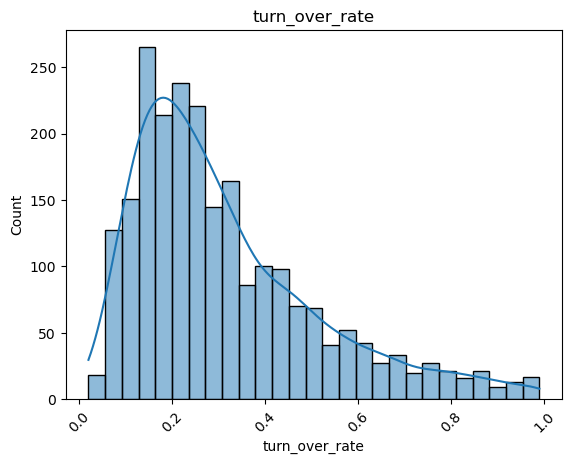

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get turn_over_rate graphs

plt.title('turn_over_rate')
plt.xticks(rotation = 45)
sns.histplot(df['turn_over_rate'],kde=True)
plt.show()

In [60]:
# # Get Data Graphs

# for i in df.columns:
#     if i != 'company_name' and i != 'turn_over_rate':
#         tmp = i + ' scatter plot'
#         plt.title(tmp)
#         # log_tor = np.log(df['turn_over_rate'].astype('float'))
#         if i == 'total_sale':
#             sns.scatterplot(x= df[i].astype(float), y = df['turn_over_rate'])
#         else:
#             sns.scatterplot(x= df[i], y = df['turn_over_rate'])
#         plt.savefig(tmp+'.png')
#         plt.cla()
#         plt.clf()

**Machine Learning**

Linear, Ridge, Lasso

In [61]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' RMSE: ', np.round(rmse,3))
    return rmse

In [62]:
def get_r2score(model):
    pred = model.predict(X_test)
    score = r2_score(y_test,pred)
    print(model.__class__.__name__, " R2SCORE: ", np.round(score,3))

In [63]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        # rmses.append(rmse)
    # return rmses

In [64]:
def get_r2scores(models):
    scores = []
    for model in models:
        score = get_r2score(model)
        # scores.append(score)
    # return scores

In [65]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['turn_over_rate']
x_data = df.drop(['company_name','turn_over_rate'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state = 7)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
print('\n')
get_r2scores(models)

LinearRegression  RMSE:  0.17
Ridge  RMSE:  0.17
Lasso  RMSE:  0.183


LinearRegression  R2SCORE:  0.291
Ridge  R2SCORE:  0.293
Lasso  R2SCORE:  0.178


In [66]:
def get_top_bottom_coef(model, n=4):

    coef = pd.Series(model.coef_, index=x_data.columns)

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)

    return coef_high, coef_low

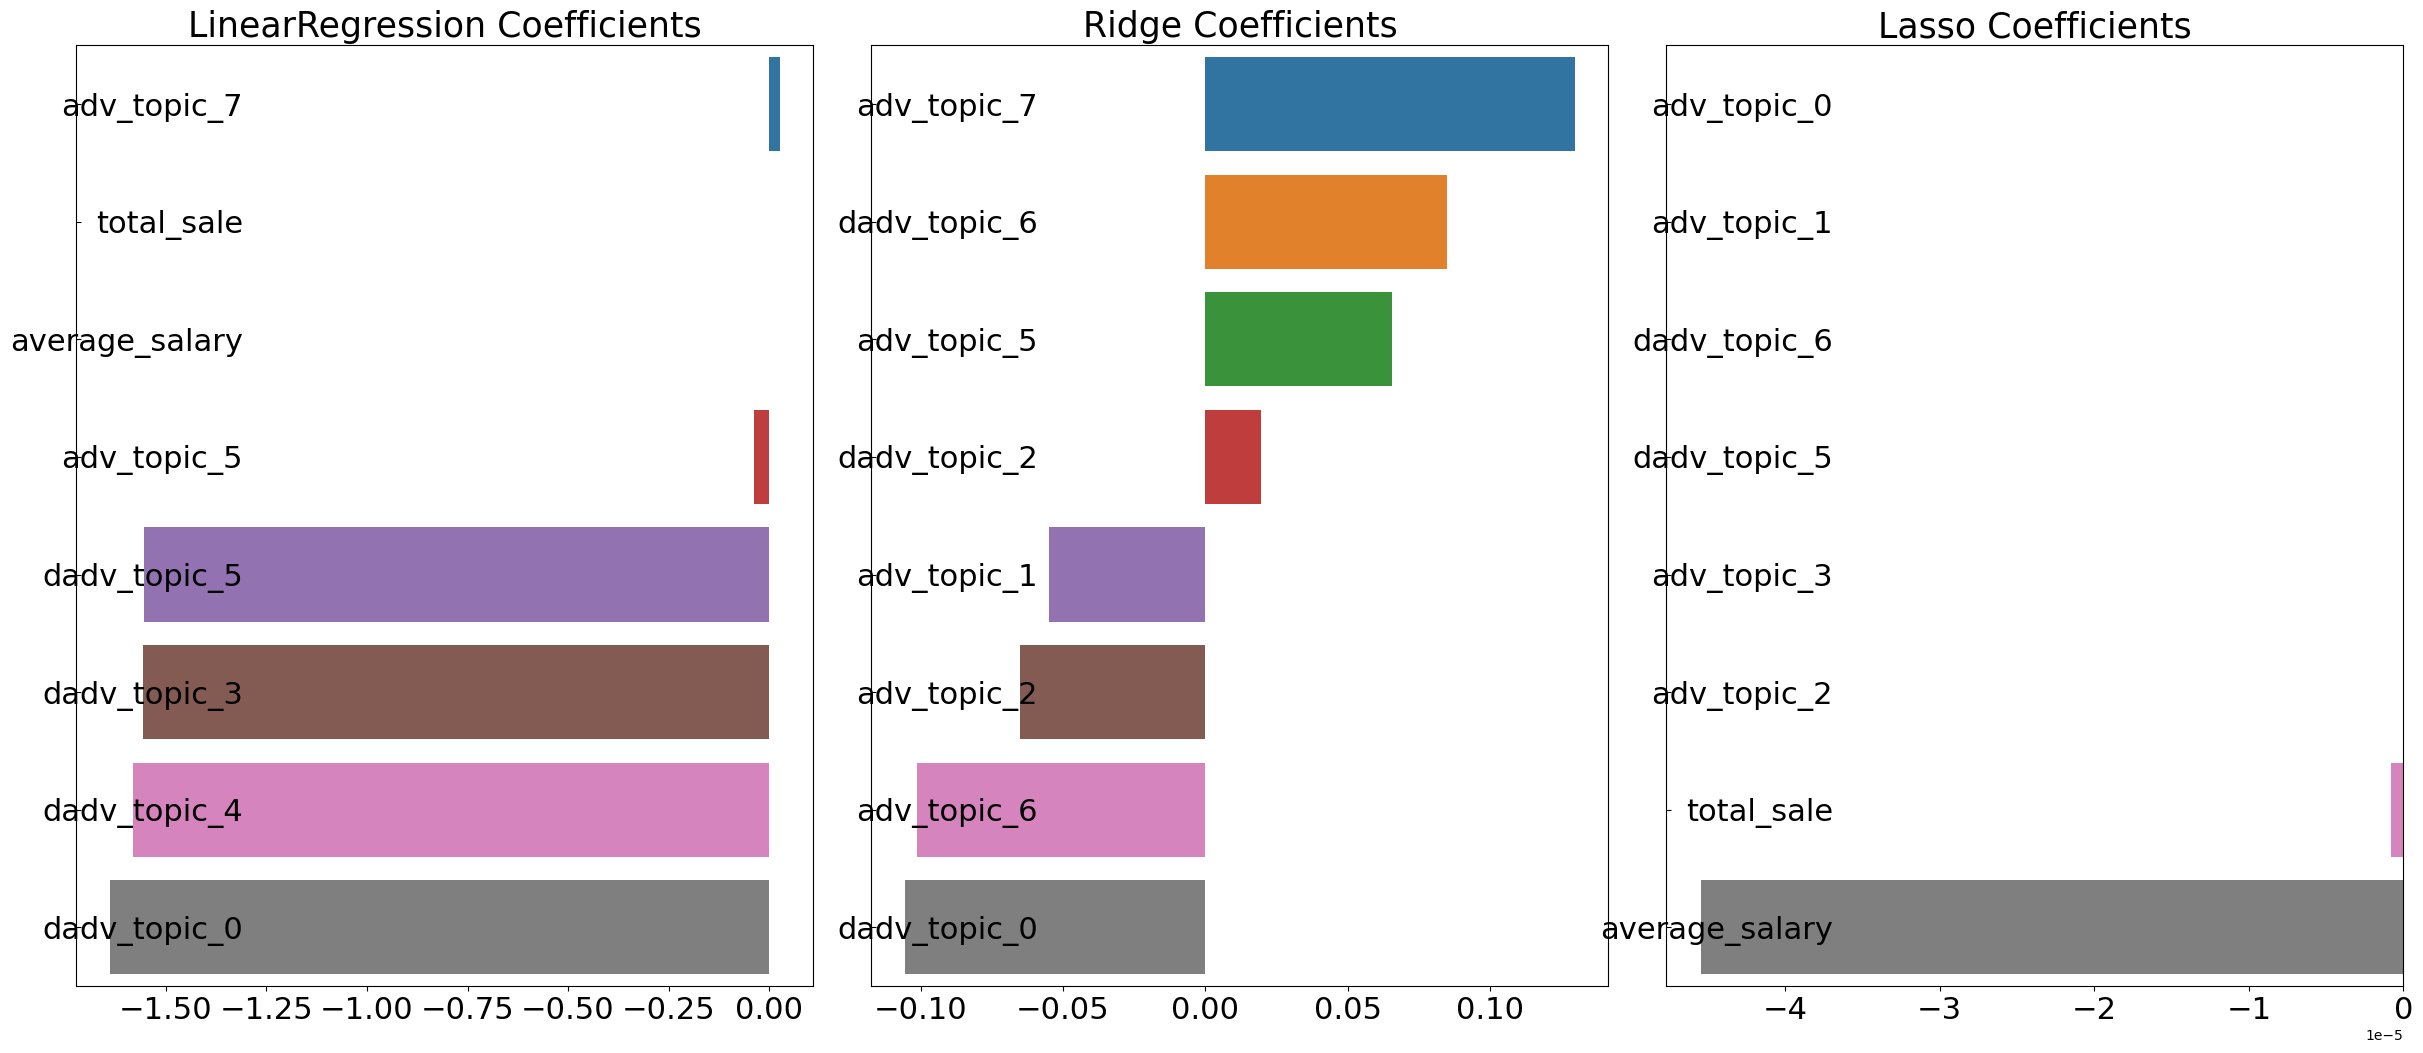

In [67]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize = (24,10), nrows = 1, ncols= 3)
    fig.tight_layout()

    for i_num, model in enumerate(models):

        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])

        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i_num].tick_params(axis="y", direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax = axs[i_num])

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [68]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:

        rmse_list = np.sqrt(-cross_val_score(model, x_data, y_target,
                                             scoring= 'neg_mean_squared_error', cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('\n{0} CV average RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))

models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE Value List: [0.161 0.176 0.151 0.171 0.196]

Ridge CV average RMSE Value List: 0.171

Lasso CV RMSE Value List: [0.172 0.185 0.164 0.181 0.201]

Lasso CV average RMSE Value List: 0.181


In [69]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(x_data.astype(float),y_target.astype(float))
    mse = -1 * grid_model.best_score_
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} After 5 CV, best average MSE: {1}, best average RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),grid_model.best_params_))
    
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_absolute_error', cv=5)
    grid_model.fit(x_data.astype(float),y_target.astype(float))
    mae = -1 * grid_model.best_score_
    print('{0} After 5 CV, best average MAE: {1}'.format(model.__class__.__name__,np.round(mse,4)))

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average MSE: 0.0292, best average RMSE: 0.171, best alpha: {'alpha': 20}
Ridge After 5 CV, best average MAE: 0.0292
Lasso After 5 CV, best average MSE: 0.0291, best average RMSE: 0.1707, best alpha: {'alpha': 0.001}
Lasso After 5 CV, best average MAE: 0.0291


LinearRegression  RMSE:  0.17
Ridge  RMSE:  0.171
Lasso  RMSE:  0.171


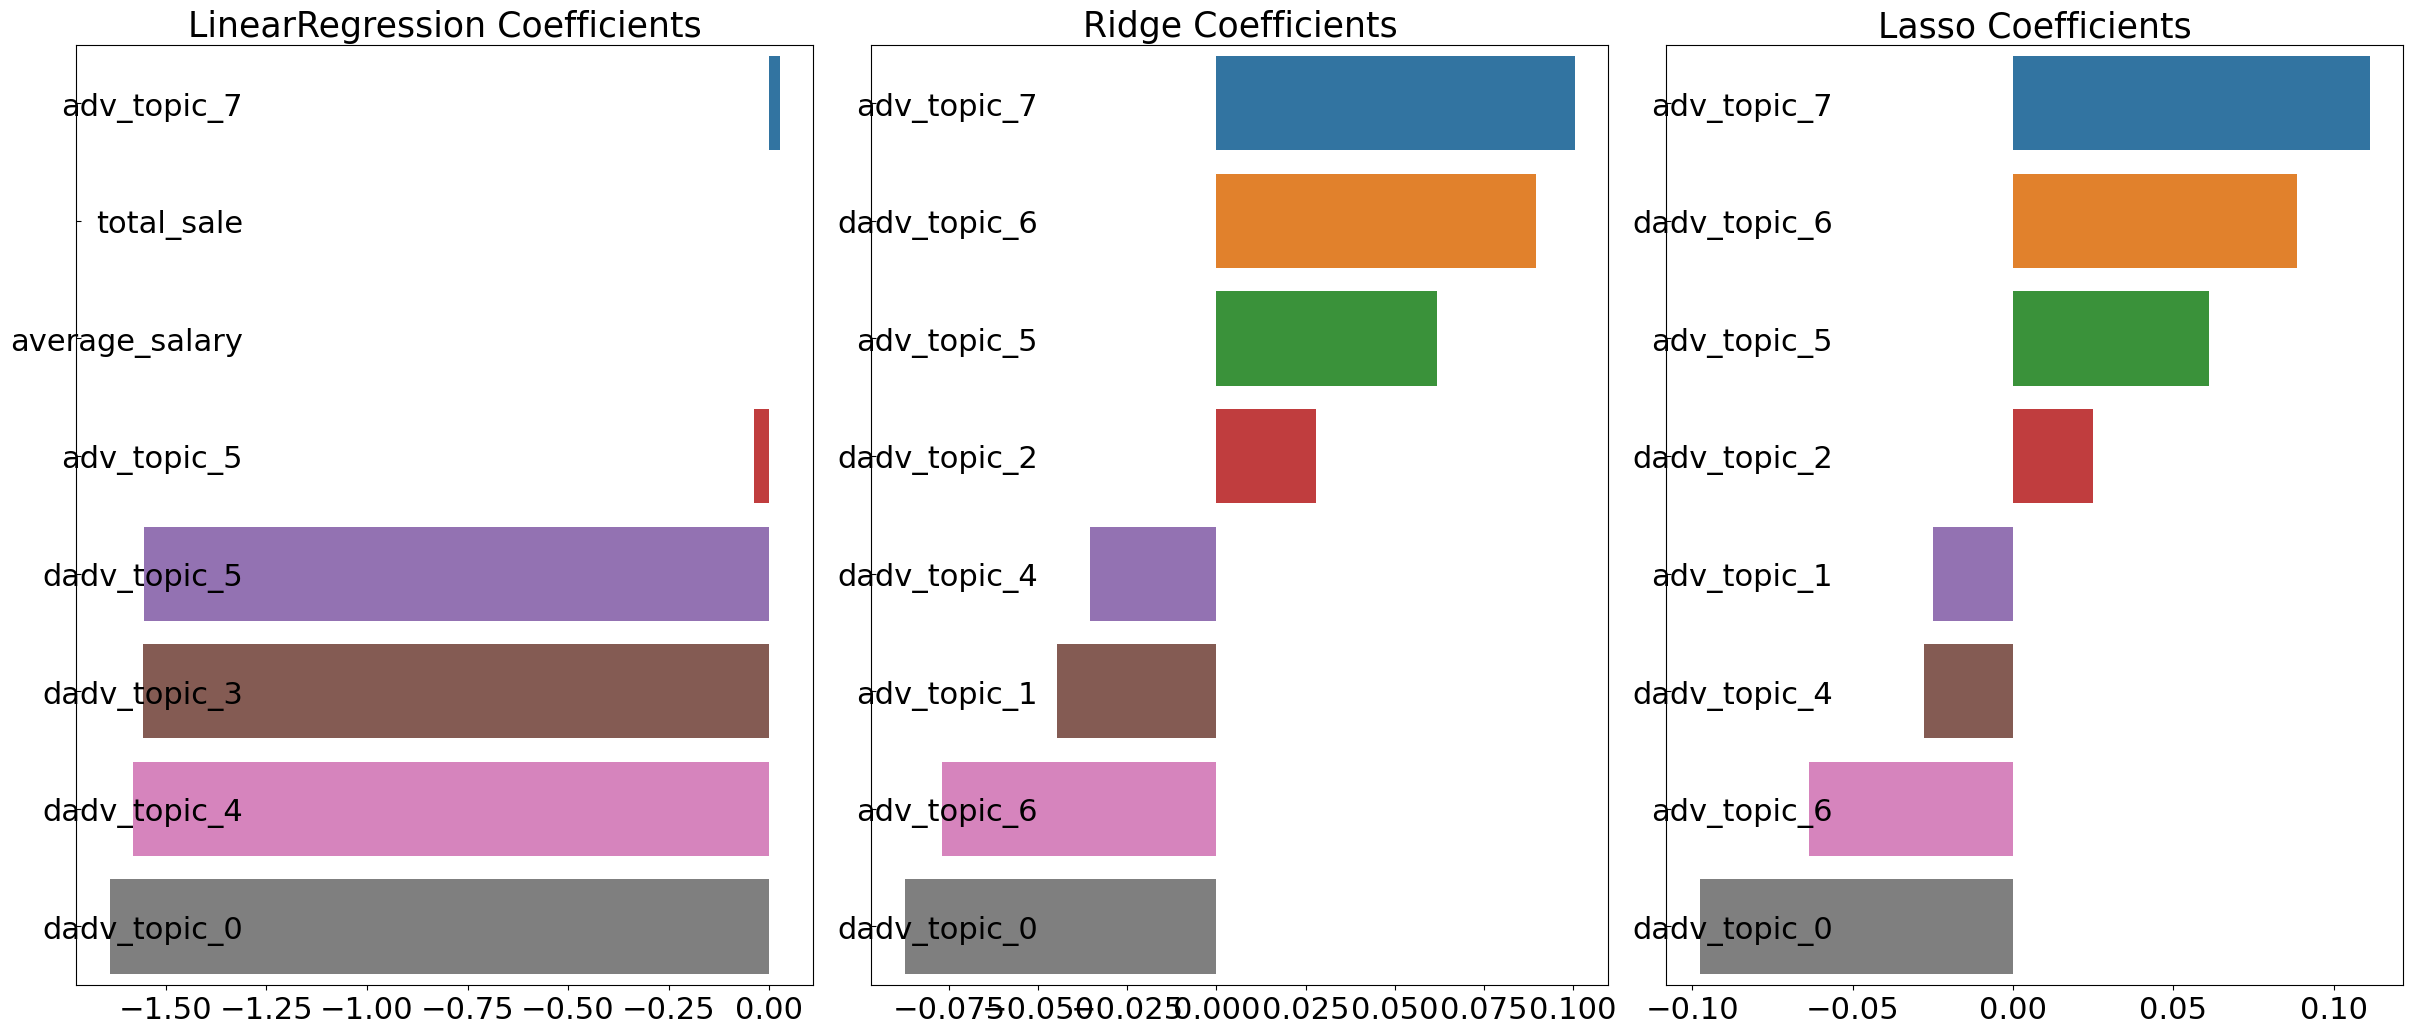

In [70]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

visualize_coefficient(models)

In [71]:
from scipy.stats import skew

feature_index = df.dtypes[df.dtypes != 'object'].index

skew_features = df[feature_index].apply(lambda x: skew(x))

skew_feature_top = skew_features[skew_features > 1]
print(skew_feature_top.sort_values(ascending=False))

adv_topic_2       3.767366
adv_topic_8       3.487064
dadv_topic_5      3.121427
dadv_topic_3      3.117032
adv_topic_7       2.586516
adv_topic_0       2.477752
dadv_topic_1      2.332141
adv_topic_4       1.955110
adv_topic_6       1.837380
average_salary    1.832503
adv_topic_5       1.702795
adv_topic_3       1.615455
adv_topic_1       1.590692
dadv_topic_2      1.495724
dadv_topic_6      1.371879
dadv_topic_0      1.364596
turn_over_rate    1.203779
dtype: float64


In [72]:
for feature in skew_feature_top.index:
    nonzero_indices = df[feature] != 0  # 0이 아닌 값의 인덱스를 찾음
    df.loc[nonzero_indices, feature] = np.log1p(df.loc[nonzero_indices, feature])

In [73]:
y_target = df['turn_over_rate']
x_data = df.drop(['company_name','turn_over_rate'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state = 7)

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average MSE: 0.0135, best average RMSE: 0.1162, best alpha: {'alpha': 0.05}
Ridge After 5 CV, best average MAE: 0.0135
Lasso After 5 CV, best average MSE: 0.0137, best average RMSE: 0.1173, best alpha: {'alpha': 0.001}
Lasso After 5 CV, best average MAE: 0.0137


LinearRegression  RMSE:  0.115
Ridge  RMSE:  0.115
Lasso  RMSE:  0.118


LinearRegression  R2SCORE:  0.358
Ridge  R2SCORE:  0.358
Lasso  R2SCORE:  0.335


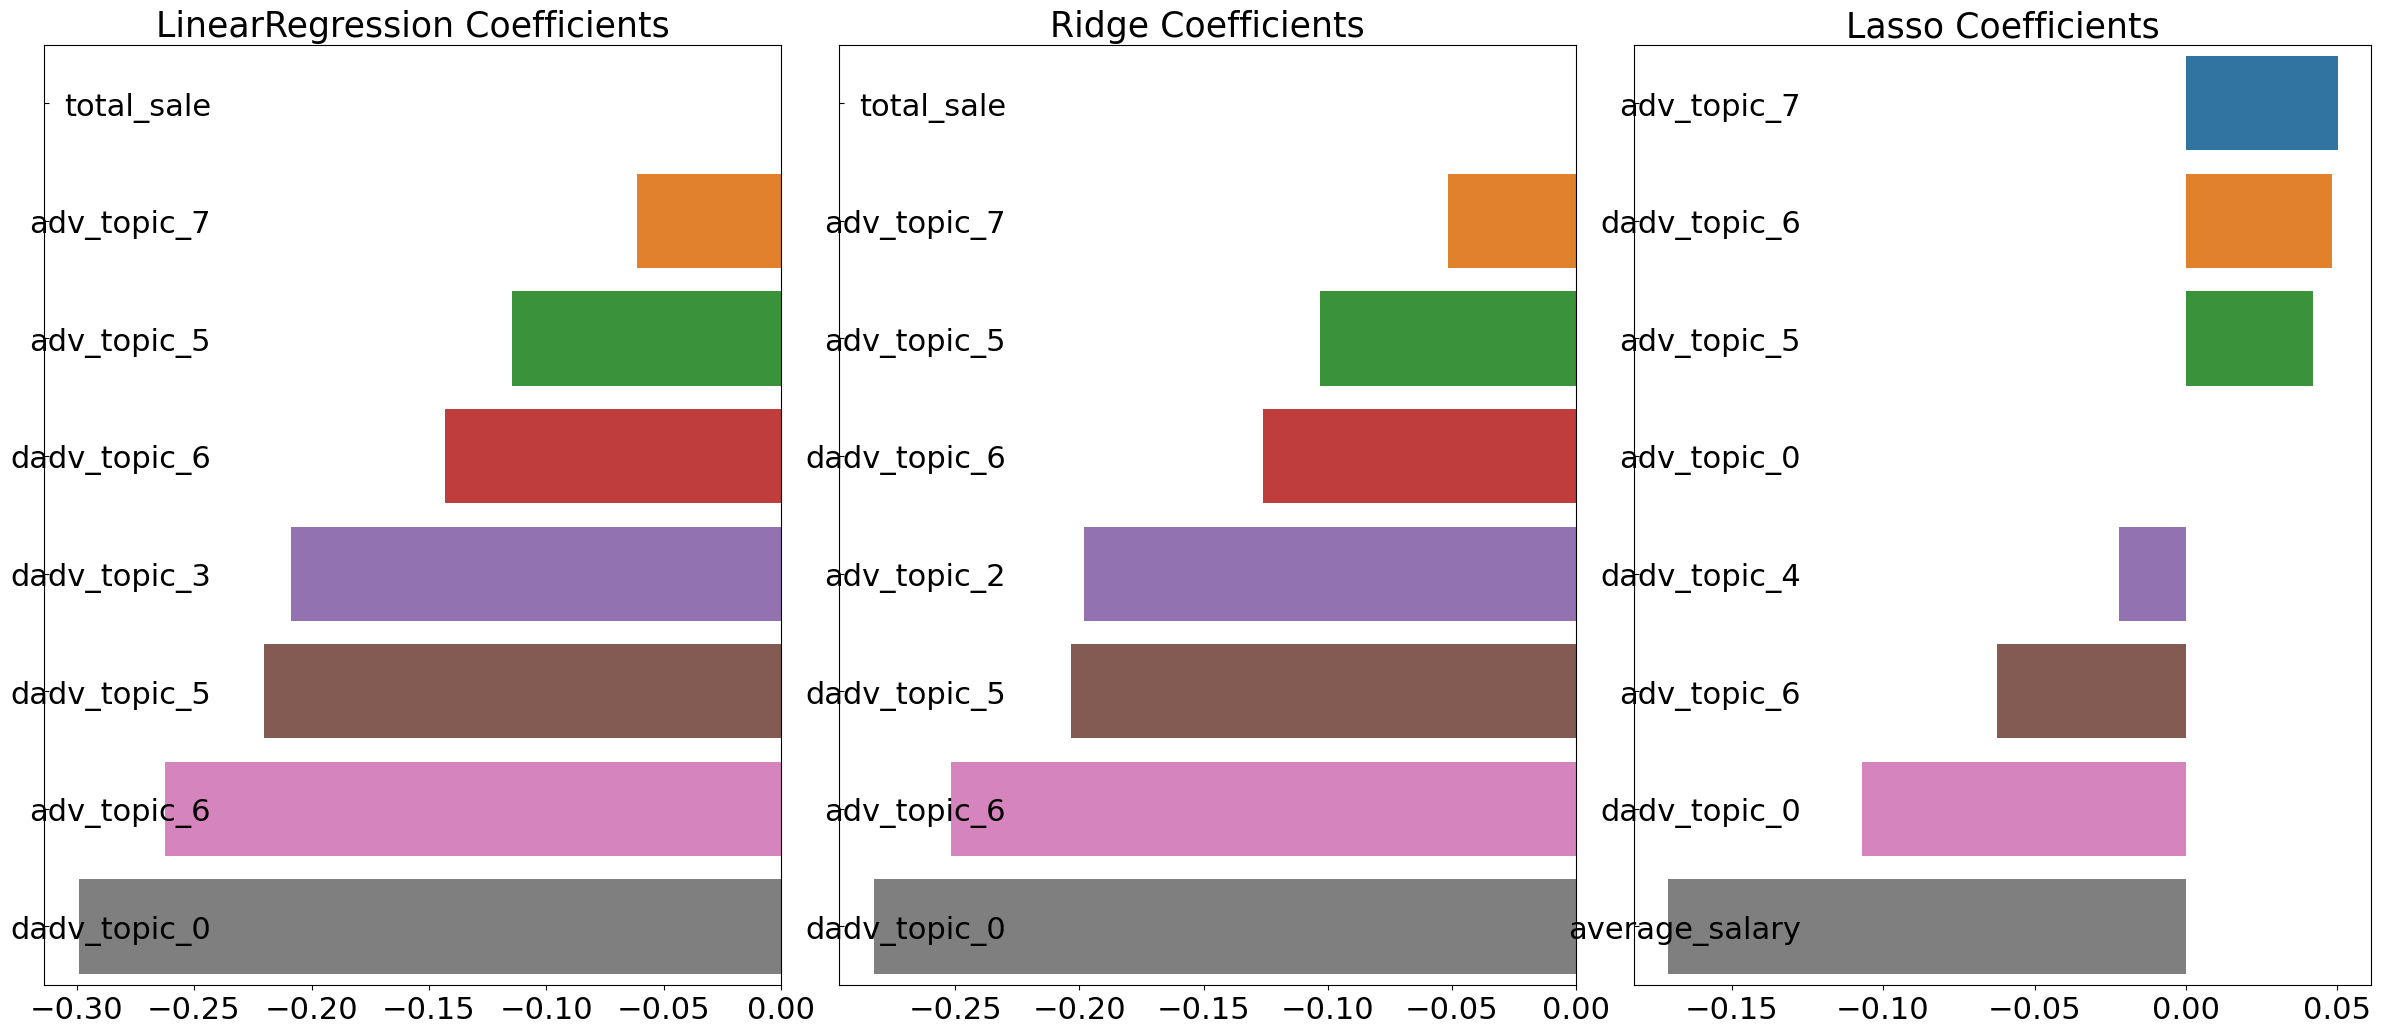

In [74]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
print('\n')
get_r2scores(models)

visualize_coefficient(models)

Decision Tree with Regression

In [75]:
from xgboost import XGBRegressor 

xgb_params = {'n_estimators': [1000]}
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)
print_best_params(xgb_reg, xgb_params)

XGBRegressor After 5 CV, best average MSE: 0.0138, best average RMSE: 0.1176, best alpha: {'n_estimators': 1000}
XGBRegressor After 5 CV, best average MAE: 0.0138


In [76]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators': [1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate= 0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg,lgbm_params)

LGBMRegressor After 5 CV, best average MSE: 0.0131, best average RMSE: 0.1143, best alpha: {'n_estimators': 1000}
LGBMRegressor After 5 CV, best average MAE: 0.0131


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {'n_estimators': [1000]}
gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate= 0.05, subsample=0.6 )
print_best_params(gb_reg,gb_params)


GradientBoostingRegressor After 5 CV, best average MSE: 0.0141, best average RMSE: 0.1188, best alpha: {'n_estimators': 1000}
GradientBoostingRegressor After 5 CV, best average MAE: 0.0141


In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {'n_estimators': [1000]}
rf_reg = RandomForestRegressor(n_estimators=1000)
print_best_params(rf_reg,rf_params)

RandomForestRegressor After 5 CV, best average MSE: 0.0131, best average RMSE: 0.1145, best alpha: {'n_estimators': 1000}
RandomForestRegressor After 5 CV, best average MAE: 0.0131


In [79]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {}
dt_reg = DecisionTreeRegressor(max_depth=4)
print_best_params(dt_reg, dt_params)

DecisionTreeRegressor After 5 CV, best average MSE: 0.0144, best average RMSE: 0.1198, best alpha: {}
DecisionTreeRegressor After 5 CV, best average MAE: 0.0144


<Axes: >

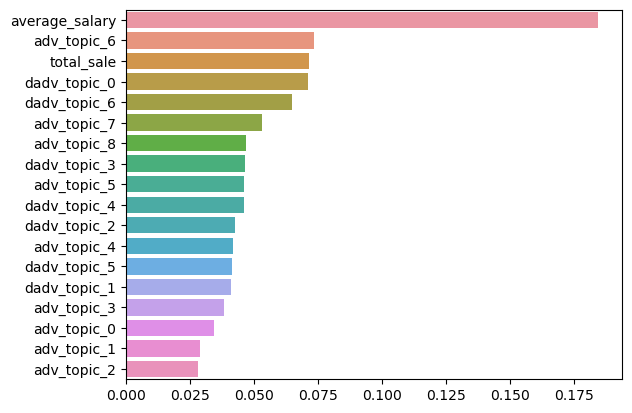

In [81]:
# Feature graph xgb
xgb_reg.fit(x_data.astype(float), y_target.astype(float))

feature_series = pd.Series(data = xgb_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

<Axes: >

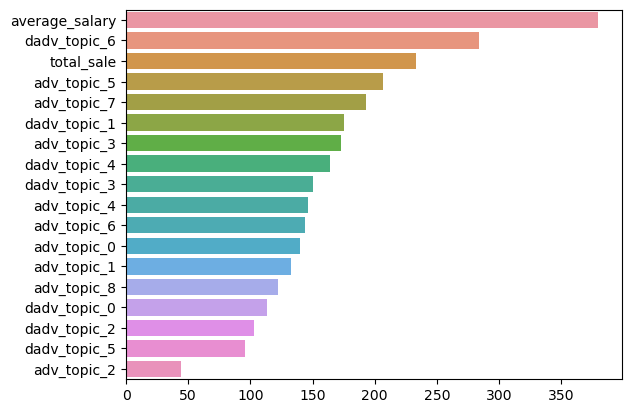

In [82]:
# Feature Graph lgbm
lgbm_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = lgbm_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)


<Axes: >

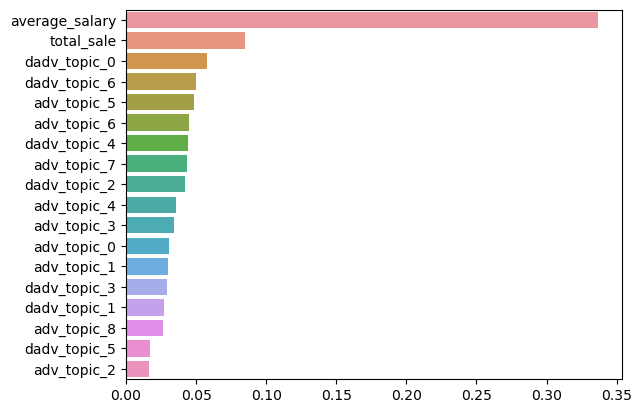

In [83]:
# Feature graph gradient boosting

gb_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = gb_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

<Axes: >

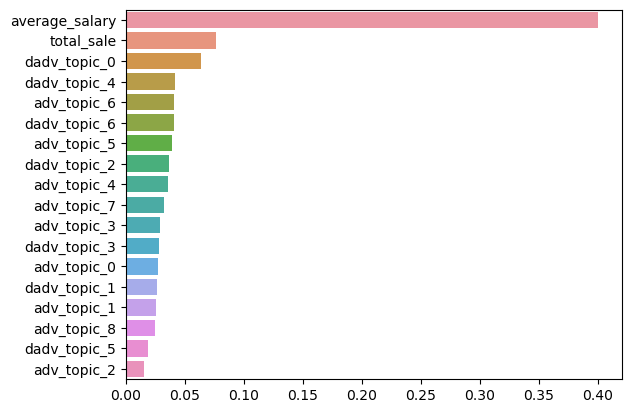

In [84]:
# Feature graph randomforest

rf_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = rf_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)


<Axes: >

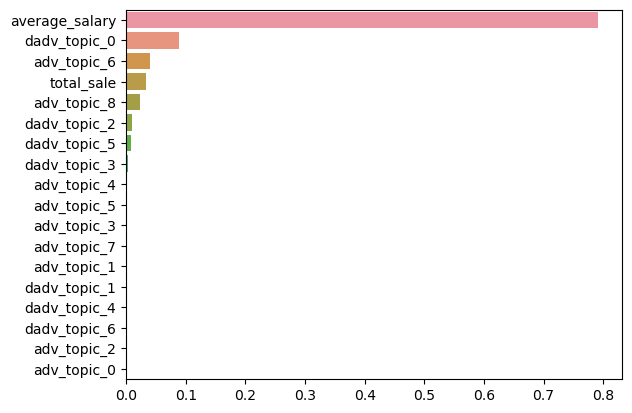

In [85]:
# Feature Graph DecisionTree
dt_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = dt_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

Combination of Regression Model

In [86]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} model\'s RMSE: {1}'.format(key, rmse))

# single model
ridge_reg = Ridge(alpha = 20)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha = 0.05)
lasso_reg.fit(X_train,y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.5 * ridge_pred + 0.5 * lasso_pred

preds = {'final combined': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

get_rmse_pred(preds)

final combined model's RMSE: 0.12458754282618069
Ridge model's RMSE: 0.11722868084152684
Lasso model's RMSE: 0.140526680913095


In [91]:
# xgb boost and random forest

lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate= 0.05, num_leaves=4,subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
rf_reg = RandomForestRegressor(n_estimators=1000)

xgb_reg.fit(X_train.astype(float),y_train.astype(float))
rf_reg.fit(X_train.astype(float),y_train.astype(float))

xgb_pred = xgb_reg.predict(X_test.astype(float))
rf_pred = rf_reg.predict(X_test.astype(float))

pred = 0.5 * xgb_pred + 0.5 * rf_pred
preds = {'final combined': pred,
         'LightGBM': xgb_pred,
         'RandomForest': rf_pred}

get_rmse_pred(preds)


final combined model's RMSE: 0.11276414182552116
LightGBM model's RMSE: 0.11637360291938334
RandomForest model's RMSE: 0.1117971595392872


Stacking Ensemble

In [92]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):

    kf = KFold(n_splits=n_folds, shuffle=False)

    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,' model start ')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):

        print('\t fold set: ', folder_counter, ' start')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        model.fit(X_tr, y_tr)

        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)

        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    return train_fold_pred, test_pred_mean

In [93]:
X_train_n = X_train.values
X_test_n = X_test.values

y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model start 
	 fold set:  0  start
	 fold set:  1  start
	 fold set:  2  start
	 fold set:  3  start
	 fold set:  4  start
Lasso  model start 
	 fold set:  0  start
	 fold set:  1  start
	 fold set:  2  start
	 fold set:  3  start
	 fold set:  4  start
LGBMRegressor  model start 
	 fold set:  0  start
	 fold set:  1  start
	 fold set:  2  start
	 fold set:  3  start
	 fold set:  4  start
RandomForestRegressor  model start 
	 fold set:  0  start
	 fold set:  1  start
	 fold set:  2  start
	 fold set:  3  start
	 fold set:  4  start


In [94]:
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, lgbm_train, rf_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, lgbm_test, rf_test),axis=1)

meta_model_lasso = Lasso(alpha = 0.005)

meta_model_lasso.fit(Stack_final_X_train,y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('Stacking regression model\'s final RMSE: ',rmse)

Stacking regression model's final RMSE:  0.12495295165271103
